In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
from src.utils_clustering import plot_clusters, evaluate_clustering, load_labels_from_file, generate_confusion_matrix, map_clusters_to_ground_truth

In [4]:
N_CLASSES = 15

In [5]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [6]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=N_CLASSES, linkage='ward')
labels_pred = agglomerative_clustering.fit_predict(processed_data)

In [7]:
cluster_distribution = Counter(labels_pred)
print(cluster_distribution)

Counter({0: 363, 2: 358, 13: 352, 9: 348, 4: 346, 1: 343, 5: 341, 3: 337, 8: 335, 7: 327, 14: 325, 11: 314, 6: 312, 10: 301, 12: 298})


In [8]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [9]:
clustering_name = 'Agglomerative_Clustering_Ward_Linkage'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

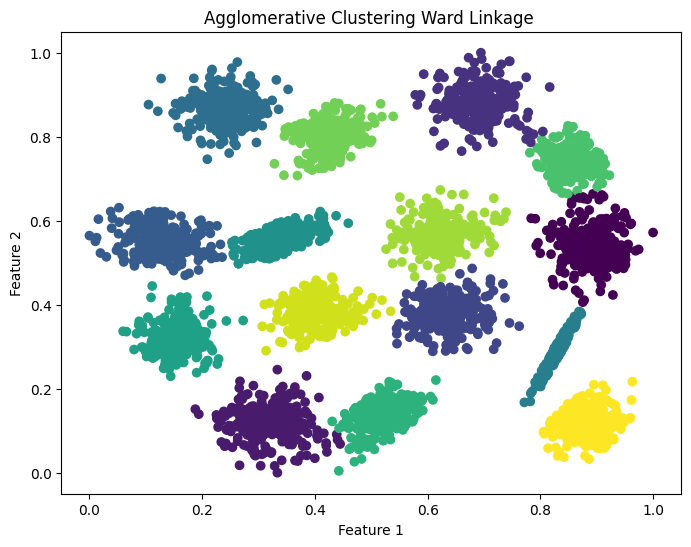

In [10]:
plot_clusters(processed_data, labels_pred, title='Agglomerative Clustering Ward Linkage ')

In [11]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clustering_name=clustering_name, dataset_name=dataset_name, 
                    results_path=results_path)

Timestamp: 2024-02-06 20:30:05.501619
Dataset: s1
Clustering Algorithm: Agglomerative_Clustering_Ward_Linkage
Accuracy: 0.0698


In [12]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


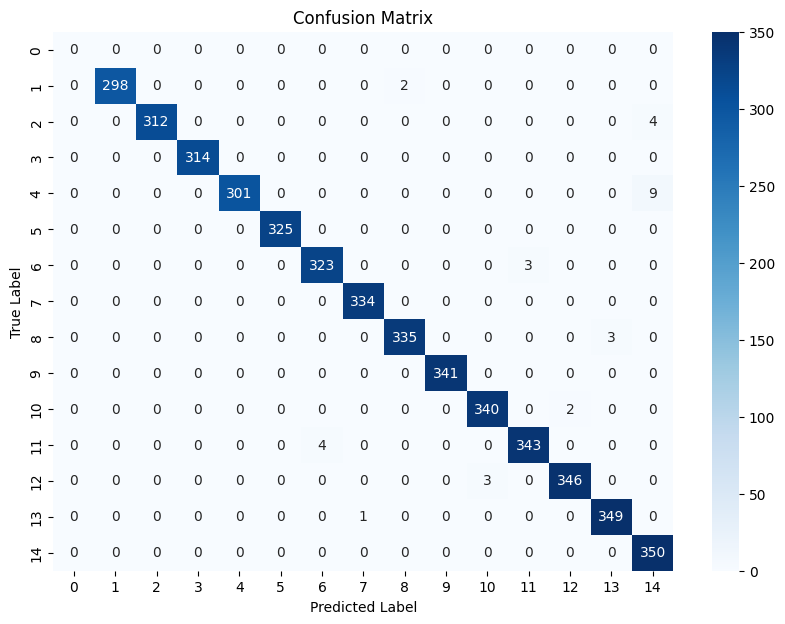

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 0.00%
Cluster 2 Accuracy: 99.33%
Cluster 3 Accuracy: 98.73%
Cluster 4 Accuracy: 100.00%
Cluster 5 Accuracy: 97.10%
Cluster 6 Accuracy: 100.00%
Cluster 7 Accuracy: 99.08%
Cluster 8 Accuracy: 100.00%
Cluster 9 Accuracy: 99.11%
Cluster 10 Accuracy: 100.00%
Cluster 11 Accuracy: 99.42%
Cluster 12 Accuracy: 98.85%
Cluster 13 Accuracy: 99.14%
Cluster 14 Accuracy: 99.71%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 99.22%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [13]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)